## Задание 1

Импортируйте библиотеки pandas, numpy и matplotlib.

Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.

Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочный данных с параметрами:

n_components=2, learning_rate=250, random_state=42.

Постройте диаграмму рассеяния на этих данных.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [3]:
from sklearn.datasets import load_boston

In [4]:
boston = load_boston()
data = boston['data']

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
feature_names = boston["feature_names"]

X = pd.DataFrame(data, columns=feature_names)

X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
target = boston["target"]

y = pd.DataFrame(target, columns=["price"])
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [11]:
from sklearn.manifold import TSNE

In [12]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

In [13]:
print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


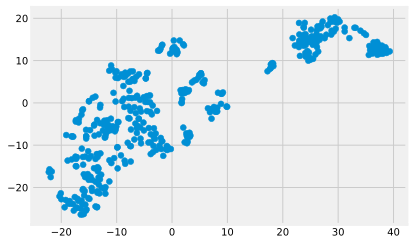

In [14]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

## Задание 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.

Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.


In [15]:
from sklearn.cluster import KMeans

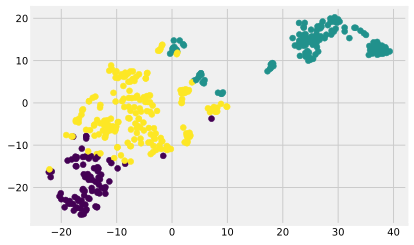

In [20]:
model = KMeans(n_clusters=3, random_state=42, max_iter=100)

labels_train = model.fit_predict(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.show()

In [34]:
print('Кластер 0: ', y_train[labels_train == 0].mean())
print('Кластер 1:', y_train[labels_train == 1].mean())
print('Кластер 2:', y_train[labels_train == 2].mean())

Кластер 0:  price    27.788372
dtype: float64
Кластер 1: price    16.165354
dtype: float64
Кластер 2: price    24.958115
dtype: float64


In [32]:
print('Кластер 0: ', X_train['CRIM'][labels_train == 0].mean())
print('Кластер 1:', X_train['CRIM'][labels_train == 1].mean())
print('Кластер 2:', X_train['CRIM'][labels_train == 2].mean())

Кластер 0:  0.07356558139534886
Кластер 1: 10.797028425196853
Кластер 2: 0.42166020942408367


## Задание 3*

Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [24]:
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [25]:
X_test_tsne = tsne.fit_transform(X_test_scaled)

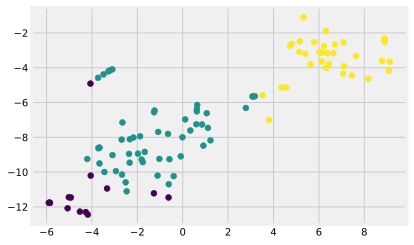

In [26]:
labels_test = model.fit_predict(X_test_scaled)

plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_test)
plt.show()

In [30]:
print('Кластер 0:', X_test['CRIM'][labels_test == 0].mean())
print('Кластер 1:', X_test['CRIM'][labels_test == 1].mean())
print('Кластер 2:', X_test['CRIM'][labels_test == 2].mean())


Кластер 0: 0.08618571428571427
Кластер 1: 0.25200716981132076
Кластер 2: 10.165531142857143
